In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix


In [17]:
def generate_xor_data(n_samples):

    X = np.random.uniform(-1, 1, (n_samples, 2))
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    return X, y


X_train, y_train = generate_xor_data(200)
X_test, y_test = generate_xor_data(200)

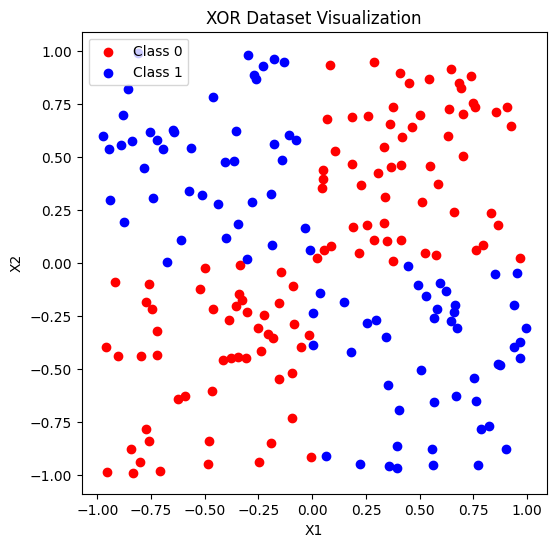

In [18]:
X_train, y_train = generate_xor_data(200)
X_test, y_test = generate_xor_data(200)

def plot_xor_data(X, y, title):

    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label="Class 0")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label="Class 1")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(title)
    plt.legend()
    plt.show()

plot_xor_data(X_train, y_train, "XOR Dataset Visualization")

In [19]:
def plot_decision_boundary(model, X, y, title, poly=None):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()]
    if poly:
        grid = poly.transform(grid)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


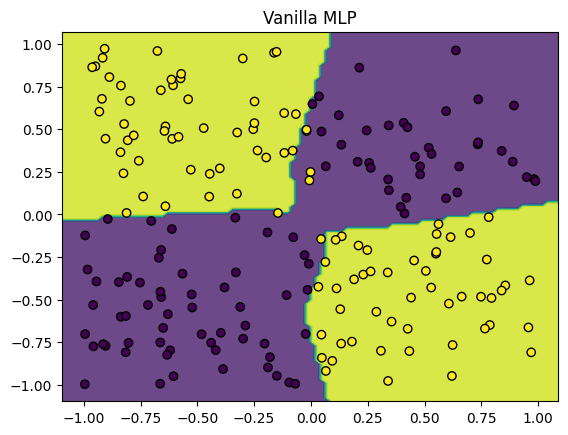

Accuracy Vanilla MLP: 0.97


In [20]:
# 1) Vanilla MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000)
mlp.fit(X_train, y_train)

plot_decision_boundary(mlp, X_test, y_test, "Vanilla MLP")

print("Accuracy Vanilla MLP:", accuracy_score(y_test, mlp.predict(X_test)))

Validation Accuracy MLP with L1 (alpha=0.001): 0.95
Validation Accuracy MLP with L1 (alpha=0.01): 0.95
Validation Accuracy MLP with L1 (alpha=0.1): 0.95

Best alpha based on validation set: 0.001 with accuracy: 0.95
Test Accuracy of the best MLP with L1 (alpha=0.001): 0.97


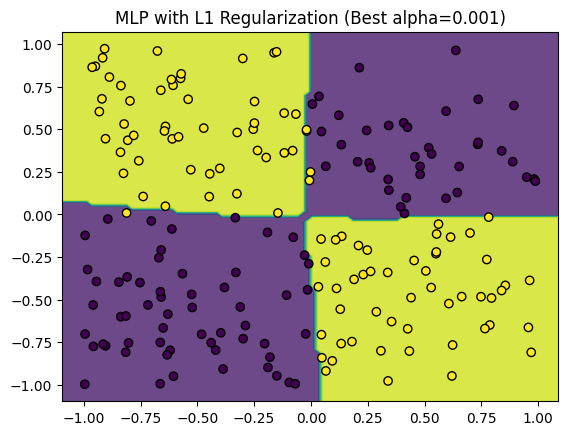

In [22]:
# 2) MLP with l1
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

l1_alphas = [0.001, 0.01, 0.1]
best_alpha = None
best_val_accuracy = 0
best_model = None

# Train MLP models with different alpha values
for alpha in l1_alphas:
    model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', alpha=alpha, max_iter=10000, solver='adam')
    model.fit(X_train_full, y_train_full)

    # Evaluate on the validation set
    val_accuracy = accuracy_score(y_val, model.predict(X_val))
    print(f"Validation Accuracy MLP with L1 (alpha={alpha}): {val_accuracy}")

    # Update best model if current model is better
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_alpha = alpha
        best_model = model

print(f"\nBest alpha based on validation set: {best_alpha} with accuracy: {best_val_accuracy}")

# Re-train the best model on the full training set
final_model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', alpha=best_alpha, max_iter=10000, solver='adam')
final_model.fit(X_train, y_train)

# Test accuracy of the best model on test data
test_accuracy = accuracy_score(y_test, final_model.predict(X_test))
print(f"Test Accuracy of the best MLP with L1 (alpha={best_alpha}): {test_accuracy}")

plot_decision_boundary(final_model, X_test, y_test, f"MLP with L1 Regularization (Best alpha={best_alpha})")


Validation Accuracy MLP with L2 (alpha=0.001): 0.925
Validation Accuracy MLP with L2 (alpha=0.01): 0.75
Validation Accuracy MLP with L2 (alpha=0.1): 0.925

Best alpha based on validation set: 0.001 with accuracy: 0.925
Test Accuracy of the best MLP with L2 (alpha=0.001): 0.97


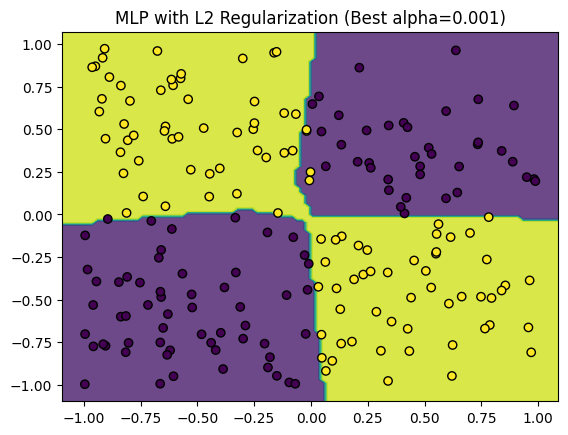

In [23]:
# 3) MLP with l2
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

l2_alphas = [0.001, 0.01, 0.1]
best_alpha = None
best_val_accuracy = 0
best_model = None

for alpha in l2_alphas:
    model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', alpha=alpha, max_iter=10000, solver='adam')
    model.fit(X_train_full, y_train_full)

    val_accuracy = accuracy_score(y_val, model.predict(X_val))
    print(f"Validation Accuracy MLP with L2 (alpha={alpha}): {val_accuracy}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_alpha = alpha
        best_model = model

print(f"\nBest alpha based on validation set: {best_alpha} with accuracy: {best_val_accuracy}")

final_model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', alpha=best_alpha, max_iter=1000, solver='adam')
final_model.fit(X_train, y_train)

# Test accuracy of the best model on test data
test_accuracy = accuracy_score(y_test, final_model.predict(X_test))
print(f"Test Accuracy of the best MLP with L2 (alpha={best_alpha}): {test_accuracy}")


# Plot the decision boundary for the final selected model
plot_decision_boundary(final_model, X_test, y_test, f"MLP with L2 Regularization (Best alpha={best_alpha})")


Available features: x1, x2, x1^2, x2^2, x1*x2, sin(x1), sin(x2)
Enter features separated by commas (e.g., x1, x2, x1*x2): x1, x2, x1^2, x2^2, x1*x2, sin(x1), sin(x2)
Selected Features: ['x1', 'x2', 'x1^2', 'x2^2', 'x1*x2', 'sin(x1)', 'sin(x2)']
Accuracy of Logistic Regression with selected features: 0.95


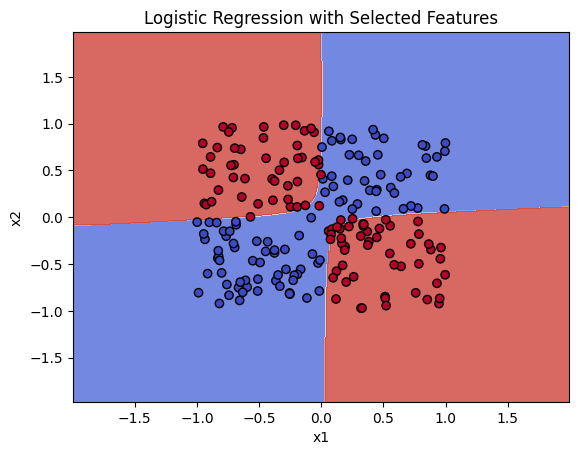

In [32]:
#4) Logistic
def transform_features(X, selected_features):
    X_new = []
    for feature in selected_features:
        if feature == 'x1':
            X_new.append(X[:, 0])
        elif feature == 'x2':
            X_new.append(X[:, 1])
        elif feature == 'x1^2':
            X_new.append(X[:, 0] ** 2)
        elif feature == 'x2^2':
            X_new.append(X[:, 1] ** 2)
        elif feature == 'x1*x2':
            X_new.append(X[:, 0] * X[:, 1])
        elif feature == 'sin(x1)':
            X_new.append(np.sin(X[:, 0]))
        elif feature == 'sin(x2)':
            X_new.append(np.sin(X[:, 1]))
    return np.column_stack(X_new)

# Function to plot decision boundary for logistic model
def plot_decision_boundary_log(model, X, y, title, selected_features):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Transform the grid using selected features
    grid_transformed = transform_features(grid, selected_features)
    Z = model.predict(grid_transformed).reshape(xx.shape)

    # Plot contour and scatter
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

available_features = ['x1', 'x2', 'x1^2', 'x2^2', 'x1*x2', 'sin(x1)', 'sin(x2)']

feature_input = input(f"Available features: {', '.join(available_features)}\n"
                      f"Enter features separated by commas (e.g., x1, x2, x1*x2): ")
selected_features = [feature.strip() for feature in feature_input.split(',')]

# Transform features
X_train_transformed = transform_features(X_train, selected_features)
X_test_transformed = transform_features(X_test, selected_features)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_transformed, y_train)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, logreg.predict(X_test_transformed))
print(f"Selected Features: {selected_features}")
print(f"Accuracy of Logistic Regression with selected features: {test_accuracy}")

# Plot decision boundary
plot_decision_boundary_log(logreg, X_test, y_test, "Logistic Regression with Selected Features", selected_features)
